# 机器学习基础操作线性模型

1. 数据集已上传至data文件夹中，具体文件为bike.csv。请使用pandas库读取该文件。

2. id属性对构建回归预测模型没有帮助，请剔除掉该列。

3. 我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除city列。

4. 为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0。

5. y列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy列向量，将原先的y列剔除。

6. 请将DataFrame对象转换为Numpy数组，方便后续操作。

7. 请按照训练集与测试集8:2的比例将原始数据集划分。

8. 请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。

9. 请先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型。

10. 利用测试集对训练好的模型进行评估。提示：使用predict(data_array)方法输入测试集，该函数返回值为模型预测值。

11. 模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。

In [3]:
# 导入库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [17]:
# 读取数据
import pandas as pd
df = pd.read_csv('data/bike.csv')
df.head()

,id,city,hour,is_workday,weather,temp_air,temp_body,wind,y
0,1,0,22,1,2,3.0,0.7,0,15
1,2,0,10,1,1,21.0,24.9,3,48
2,3,0,0,1,1,25.3,27.4,0,21
3,4,0,7,0,1,15.7,16.2,0,11
4,5,1,10,1,1,21.1,25.0,2,39


2. id属性对构建回归预测模型没有帮助，请剔除掉该列。

In [18]:
df = df.drop('id', axis=1)
df.head()

,city,hour,is_workday,weather,temp_air,temp_body,wind,y
0,0,22,1,2,3.0,0.7,0,15
1,0,10,1,1,21.0,24.9,3,48
2,0,0,1,1,25.3,27.4,0,21
3,0,7,0,1,15.7,16.2,0,11
4,1,10,1,1,21.1,25.0,2,39


3. 我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除city列。

In [19]:

df = df[df['city'] == 1]
df = df.drop('city', axis=1)
df.head()

,hour,is_workday,weather,temp_air,temp_body,wind,y
4,10,1,1,21.1,25.0,2,39
5,0,1,1,20.4,18.2,0,12
9,4,1,3,17.4,18.0,3,2
10,0,1,1,14.9,15.3,2,6
11,8,0,1,25.0,28.1,0,25


4. 为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0。

In [20]:

df['hour'] = df['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)
df.head()

,hour,is_workday,weather,temp_air,temp_body,wind,y
4,1,1,1,21.1,25.0,2,39
5,0,1,1,20.4,18.2,0,12
9,0,1,3,17.4,18.0,3,2
10,0,1,1,14.9,15.3,2,6
11,1,0,1,25.0,28.1,0,25


5. y列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy列向量，将原先的y列剔除。

In [21]:

y = df['y'].values
df = df.drop('y', axis=1)

print(y[:5])

[39 12  2  6 25]


6. 请将DataFrame对象转换为Numpy数组，方便后续操作。

In [22]:

X = df.values
print(X[:5])

[[ 1.   1.   1.  21.1 25.   2. ]
 [ 0.   1.   1.  20.4 18.2  0. ]
 [ 0.   1.   3.  17.4 18.   3. ]
 [ 0.   1.   1.  14.9 15.3  2. ]
 [ 1.   0.   1.  25.  28.1  0. ]]


7. 请按照训练集与测试集8:2的比例将原始数据集划分。

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("训练集数据形状:", X_train.shape)
print("测试集数据形状:", X_test.shape)

训练集数据形状: (3998, 6)
测试集数据形状: (1000, 6)


8. 请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。

In [24]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
y_train = mm.fit_transform(y_train.reshape(-1, 1))
y_test = mm.transform(y_test.reshape(-1, 1))

print("归一化后的训练集数据:", X_train[:5])
print("归一化后的训练集标签:", y_train[:5])
print("归一化后的测试集数据:", X_test[:5])
print("归一化后的测试集标签:", y_test[:5])

归一化后的训练集数据: [[1.         1.         0.         0.765625   0.69711538 0.28571429]
 [1.         1.         0.5        0.56026786 0.5400641  0.28571429]
 [0.         0.         1.         0.22767857 0.20673077 0.57142857]
 [0.         1.         0.         0.24330357 0.21794872 0.42857143]
 [1.         1.         0.         0.546875   0.53044872 0.42857143]]
归一化后的训练集标签: [[0.26666667]
 [0.19487179]
 [0.05128205]
 [0.02051282]
 [0.15897436]]
归一化后的测试集数据: [[0.         1.         0.5        0.515625   0.50641026 0.14285714]
 [1.         1.         0.5        0.59598214 0.56730769 0.        ]
 [0.         1.         0.         0.72991071 0.68589744 0.        ]
 [1.         1.         1.         0.625      0.54166667 0.14285714]
 [1.         1.         0.         0.64285714 0.65224359 0.28571429]]
归一化后的测试集标签: [[0.01538462]
 [0.25641026]
 [0.00512821]
 [0.28205128]
 [0.3025641 ]]


9. 请先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型。

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[[ 0.16981936 -0.00424414 -0.08863808  0.22887886  0.17970188  0.0278412 ]] [-0.0600441]


10. 利用测试集对训练好的模型进行评估。提示：使用predict(data_array)方法输入测试集，该函数返回值为模型预测值。

In [26]:
y_pred = model.predict(X_test)
print("pred:", y_pred[:5])
print("gt:", y_test[:5])

pred: [[0.10438858]
 [0.29956606]
 [0.22602996]
 [0.26125816]
 [0.37783156]]
gt: [[0.01538462]
 [0.25641026]
 [0.00512821]
 [0.28205128]
 [0.3025641 ]]


11. 模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.1624472607739073


# 利用K近邻算法学习鸢尾花数据集


K近邻（K-Nearest Neighbors，简称KNN）算法是一种基本的分类和回归方法，也是监督学习中最简单、直观的方法之一。

该算法基于一个简单的思想：如果一个样本在特征空间中的k个最近邻居中的大多数属于某个类别，则该样本也属于这个类别。

利用鸢尾花数据集进行实验，鸢尾花数据集可以通过sklearn库导入

1. 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
2. 以花萼长度为横轴，花萼宽度为纵轴绘制数据的散点图
3. 对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2
4. 以K=3训练分类器
5. 在测试集上进行测试，最后输出分类准确率

In [28]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

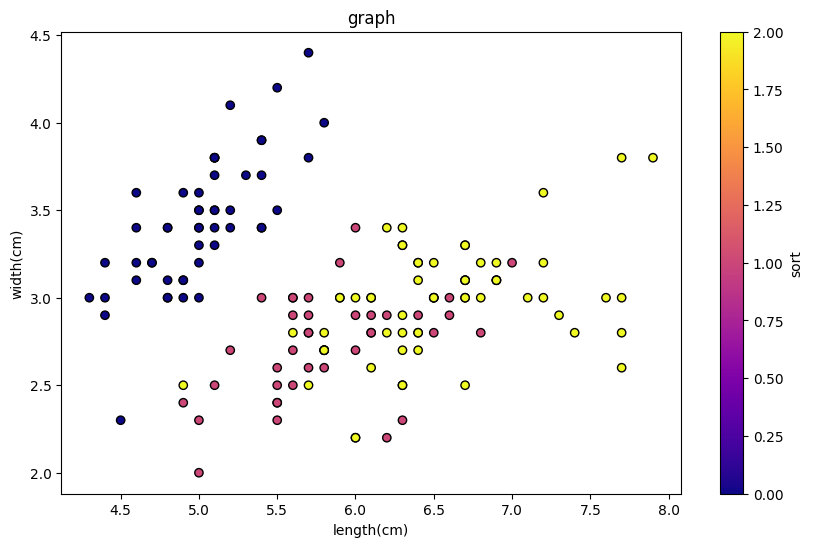

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', edgecolor='k')
plt.xlabel('length(cm)')
plt.ylabel('width(cm)')
plt.title('graph')
plt.colorbar(label='sort')
plt.show()

3. 对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2

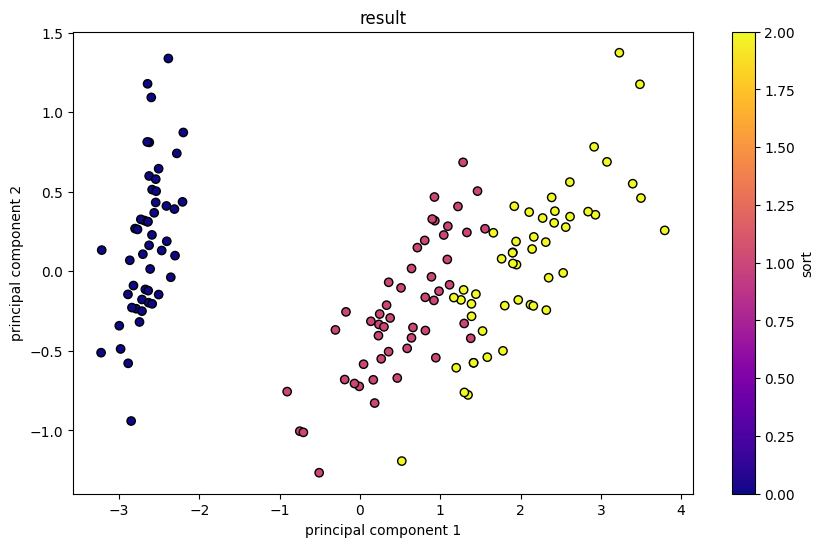

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', edgecolor='k')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('result')
plt.colorbar(label='sort')
plt.show()

#4. 以K=3训练分类器

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 1.0
